# Chapter 11: Geographic Location Visualization and Analysis

In [3]:
# 11.1 The great-circle distance: A metric for computing the distance between two global points
# Defining a great-circle distance function
from math import cos, sin, asin
import numpy as np

def great_circle_distance(x1, y1, x2, y2):
    delta_x, delta_y = x2 - x1, y2 - y1
    haversin = sin(delta_x / 2) ** 2 + np.product([cos(x1), cos(x2), sin(delta_y / 2) ** 2])
    return 2 * asin(haversin ** 0.5)

In [4]:
# Computing the great-circle distance
from math import pi
distance = great_circle_distance(0, 0, 0, pi)
print(f"The distance equals {distance} units")

The distance equals 3.141592653589793 units


In [5]:
# Defining the coordinates of Earth's poles
latitude_north, longitude_north = (90.0, 0)
latitude_south, longitude_south = (-90.0, 0)

In [6]:
# Computing the great-circle distance between poles
to_radians = np.radians([latitude_north, longitude_north, latitude_south, longitude_south])
distance = great_circle_distance(*to_radians.tolist())
print(f"The unit-circle distance between poles equals {distance} units")

The unit-circle distance between poles equals 3.141592653589793 units


In [7]:
# Compting the travel distance between Earth's poles
earth_distance = 3956 * distance
print(f"The distance bwtween poles equals {earth_distance} miles")

The distance bwtween poles equals 12428.14053760122 miles


In [8]:
# Defining a travel distance function
def travel_distance(lat1, lon1, lat2, lon2):
    to_radians = np.radians([lat1, lon1, lat2, lon2])
    return 3956 * great_circle_distance(*to_radians.tolist())

assert travel_distance(90, 0, -90, 0) == earth_distance

In [10]:
# 11.2 Plotting maps using Cartopy
# Importing the Cartopy library
import cartopy

In [13]:
# 11.2.3 Visualizing maps
# Importing the plate carree projection
from cartopy.crs import PlateCarree
import matplotlib.pyplot as plt

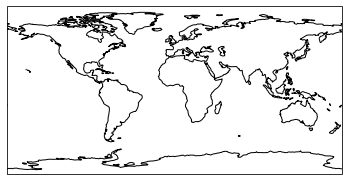

In [21]:
# Visualizing the Earth using Cartopy
plt.axes(projection=PlateCarree()).coastlines()
plt.show()

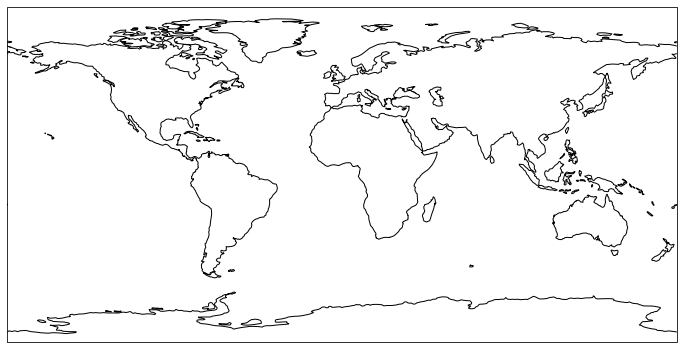

In [15]:
# Visialzong a larger map of the Earth
plt.figure(figsize=(12, 8))
plt.axes(projection=PlateCarree()).coastlines()
plt.show()

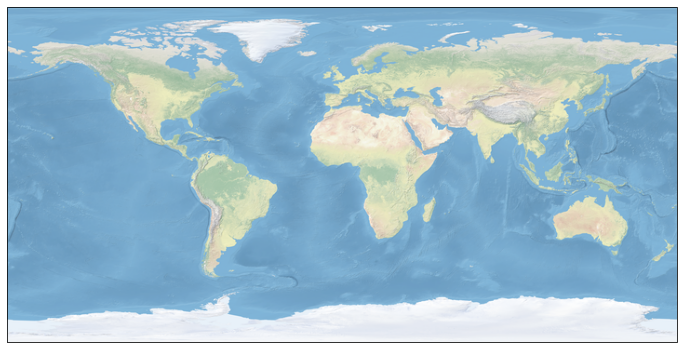

In [16]:
# Coloring a map of the Earth
fig = plt.figure(figsize=(12, 8))
plt.axes(projection=PlateCarree()).stock_img()
plt.show()

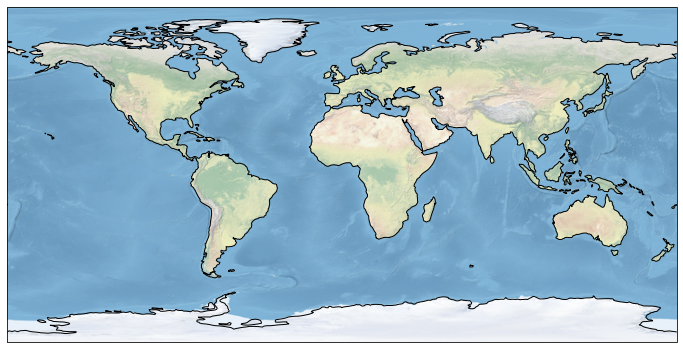

In [17]:
# Plotting coastlines together with map colors
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
ax.coastlines()
ax.stock_img()
plt.show()

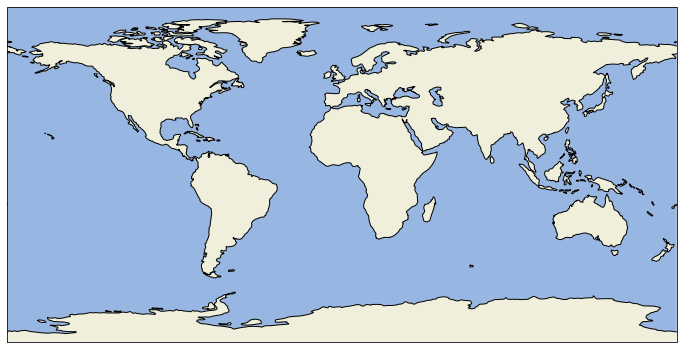

In [20]:
# Adding colors with the feature module
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
plt.show()

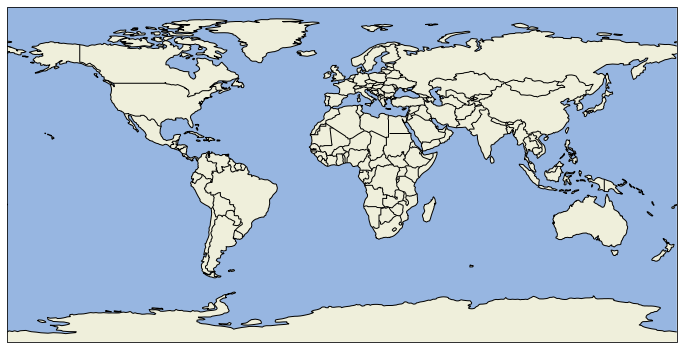

In [23]:
# Adding national borders to the plot
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
plt.show()

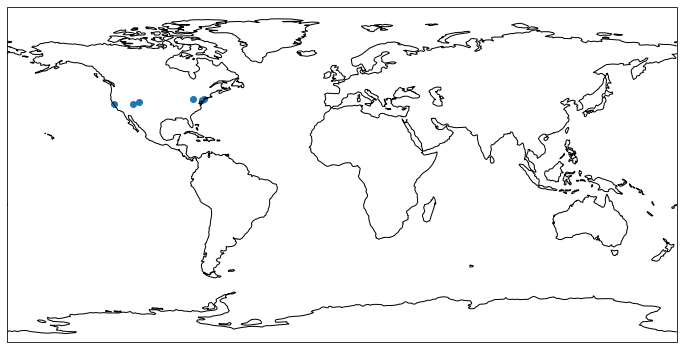

In [26]:
# Plotting coordinates on a map
plt.figure(figsize=(12, 8))
coordinates = [(39.9526, -75.1652), (37.7749, -122.4194), (40.4406, -79.9959), 
              (38.6807, -108.9769), (37.8716, -112.2727), (40.7831, -73.9712)]

latitudes, longitudes = np.array(coordinates).T
ax = plt.axes(projection=PlateCarree())
ax.scatter(longitudes, latitudes)
ax.set_global()
ax.coastlines()
plt.show()

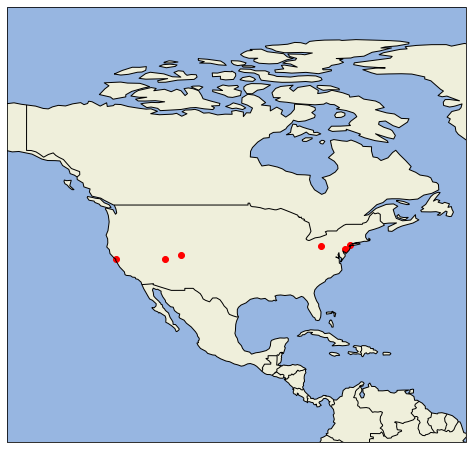

In [27]:
# Plotting North American coordinates
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
north_america_extent = (-145, -50, 0, 90)
ax.set_extent(north_america_extent)
ax.scatter(longitudes, latitudes, color='r')

def add_map_features():
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.LAND)
    
add_map_features()
plt.show()

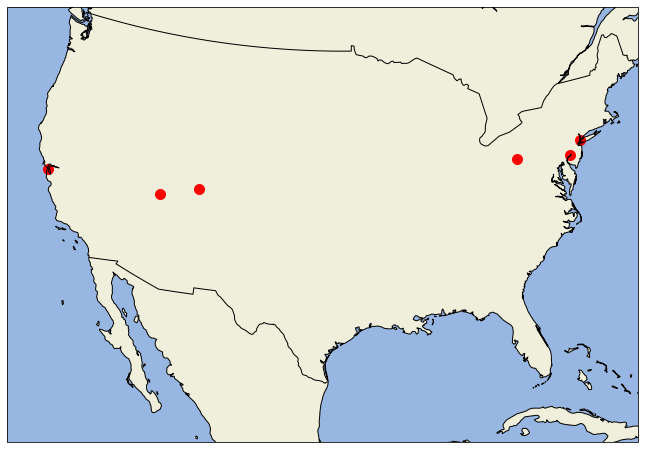

In [29]:
# Lambert conformal conic projection: Cone is placed on top of the spherical Earth
# Plotting US coordinates
from cartopy.crs import LambertConformal

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=LambertConformal())
us_extent = (-120, -75, 20, 50)
ax.set_extent(us_extent)

ax.scatter(longitudes, latitudes, color='r', transform=PlateCarree(), s=100)
add_map_features()
plt.show()

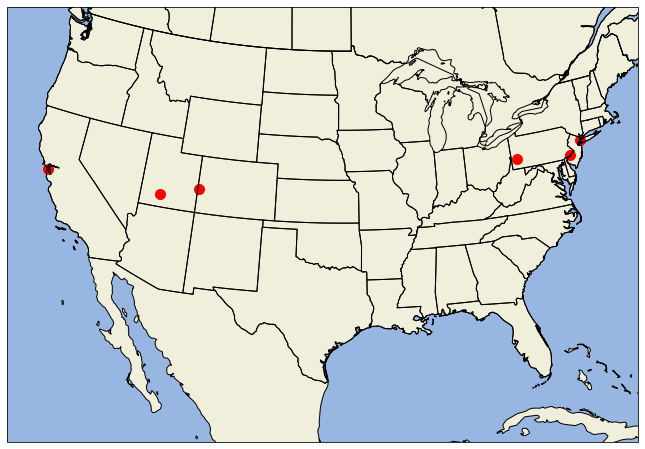

In [31]:
# Plotting a US map including state borders
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=LambertConformal())
ax.set_extent(us_extent)

ax.scatter(longitudes, latitudes, color='r', transform=PlateCarree(), s=100)

ax.add_feature(cartopy.feature.STATES)
add_map_features()
plt.show()

In [39]:
# 11.3 Location tracking using GeoNamesCache
# Initializing a GeonamesCache object
from geonamescache import GeonamesCache
gc = GeonamesCache()

In [40]:
# Fetching all seven continents from GeoNamesCache
continents = gc.get_continents()
print(continents.keys())

dict_keys(['AF', 'AS', 'EU', 'NA', 'OC', 'SA', 'AN'])


In [41]:
# Fetching North America from GeoNamesCache
north_america = continents['NA']
print(north_america.keys())

dict_keys(['lng', 'geonameId', 'timezone', 'bbox', 'toponymName', 'asciiName', 'astergdem', 'fcl', 'population', 'wikipediaURL', 'adminName5', 'srtm3', 'adminName4', 'adminName3', 'alternateNames', 'cc2', 'adminName2', 'name', 'fclName', 'fcodeName', 'adminName1', 'lat', 'fcode', 'continentCode'])


In [43]:
# Printing North America's naming schemes
for name_key in ['name', 'asciiName', 'toponymName']:
    print(north_america[name_key])

North America
North America
North America


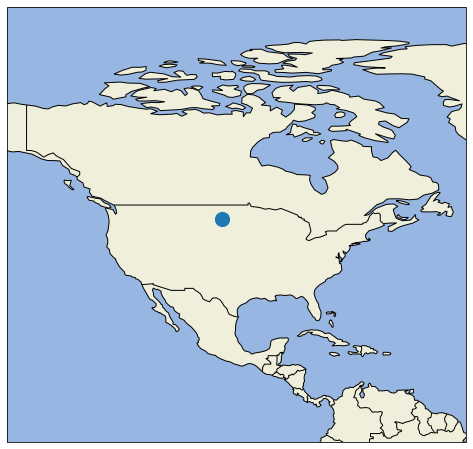

In [45]:
latitude = float(north_america['lat'])
longitude = float(north_america['lng'])

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
ax.set_extent(north_america_extent)
ax.scatter([longitude], [latitude], s=200)
add_map_features()
plt.show()

In [ ]:
import pprint as pp

In [47]:
# 11.3.1 Accessing country information
# Fetching US data from GeoNamesCache
countries = gc.get_countries()
num_countries = len(countries)
print(f"GeonamesCache holds data for {num_countries} countries")

us_data = countries['US']
print("The following data pertains to the United States:")
pp.pprint(us_data)

GeonamesCache holds data for 252 countries
The following data pertains to the United States:
{'areakm2': 9629091,
 'capital': 'Washington',
 'continentcode': 'NA',
 'currencycode': 'USD',
 'currencyname': 'Dollar',
 'fips': 'US',
 'geonameid': 6252001,
 'iso': 'US',
 'iso3': 'USA',
 'isonumeric': 840,
 'languages': 'en-US,es-US,haw,fr',
 'name': 'United States',
 'neighbours': 'CA,MX,CU',
 'phone': '1',
 'population': 327167434,
 'postalcoderegex': '^\\d{5}(-\\d{4})?$',
 'tld': '.us'}


In [49]:
# Fetching neighbor countries
us_neighbors = us_data['neighbours']
for neighbor_code in us_neighbors.split(','):
    print(countries[neighbor_code]['name'])

Canada
Mexico
Cuba


In [56]:
# Fetching countries by name
result = gc.get_countries_by_names()['United States']
assert result == countries['US']

In [57]:
# 11.3.2 Accessing city information
# Fetching cities from GeoNamesCache
cities = gc.get_cities()
num_cities = len(cities)
print(f"GeoNamesCache holds data for {num_cities} total cities")
city_id = list(cities.keys())[0]
pp.pprint(cities[city_id])

GeoNamesCache holds data for 26457 total cities
{'admin1code': '08',
 'alternatenames': ["Ehskal'des-Ehndzhordani",
                    'Escaldes',
                    'Escaldes-Engordany',
                    'Les Escaldes',
                    'esukarudesu=engorudani jiao qu',
                    'lai sai si ka er de-en ge er da',
                    'Эскальдес-Энджордани',
                    'エスカルデス＝エンゴルダニ教区',
                    '萊塞斯卡爾德-恩戈爾達',
                    '萊塞斯卡爾德－恩戈爾達'],
 'countrycode': 'AD',
 'geonameid': 3040051,
 'latitude': 42.50729,
 'longitude': 1.53414,
 'name': 'les Escaldes',
 'population': 15853,
 'timezone': 'Europe/Andorra'}


In [58]:
# Fetching US cities from GeoNamesCache
us_cities = [city for city in cities.values() if city['countrycode'] == 'US']
num_us_cities = len(us_cities)
print(f"GeoNamesCache holds data for {num_us_cities} US cities.")

GeoNamesCache holds data for 3269 US cities.


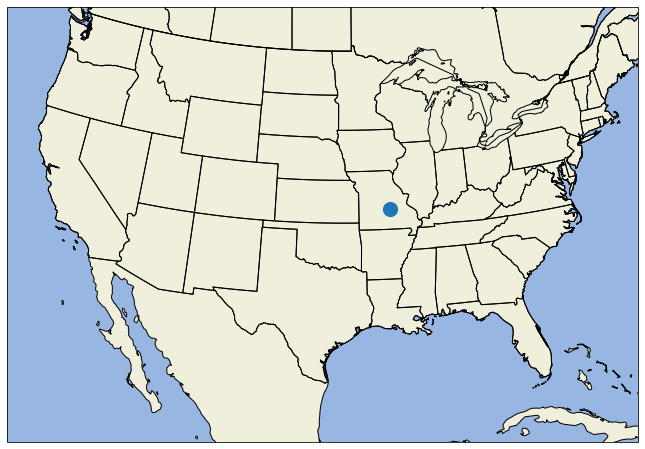

In [61]:
# Approximating US central coordinates by averaging city coordinates
center_lat = np.mean([city['latitude'] for city in us_cities])
center_lon = np.mean([city['longitude'] for city in us_cities])

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=LambertConformal())
ax.set_extent(us_extent)
ax.scatter([center_lon], [center_lat], transform=PlateCarree(), s=200)
ax.add_feature(cartopy.feature.STATES)
add_map_features()
plt.show()
# Will be skewed toward the East because there are more cities near the Atlantic Ocean

In [63]:
# Fetching cities by name
matched_cities_by_name = gc.get_cities_by_name('Philadelphia')
pp.pprint(matched_cities_by_name)

[{'4560349': {'admin1code': 'PA',
              'alternatenames': ['Coaquannock',
                                 'Fi-sang',
                                 'Fi-sàng',
                                 "Filadehl'fija",
                                 "Filadel'fi",
                                 "Filadel'fij",
                                 "Filadel'fija",
                                 'Filadelfi',
                                 'Filadelfia',
                                 'Filadelfiae',
                                 'Filadelfie',
                                 'Filadelfii',
                                 'Filadelfija',
                                 'Filadelfijo',
                                 'Filadelfio',
                                 'Filadelfiya',
                                 'Filadelfiye',
                                 'Filadelfiä',
                                 'Filadèlfia',
                                 'Filadélfia',
                     

In [64]:
# Fetching multiple cities with a shared name
matched_cities_list = gc.get_cities_by_name('San Francisco')
for i, san_francisco in enumerate(matched_cities_list):
    city_info = list(san_francisco.values())[0]
    country_code = city_info['countrycode']
    country = countries[country_code]['name']
    print(f"The San Francisco at index {i} is located in {country}")

The San Francisco at index 0 is located in Argentina
The San Francisco at index 1 is located in Costa Rica
The San Francisco at index 2 is located in Philippines
The San Francisco at index 3 is located in Philippines
The San Francisco at index 4 is located in El Salvador
The San Francisco at index 5 is located in United States


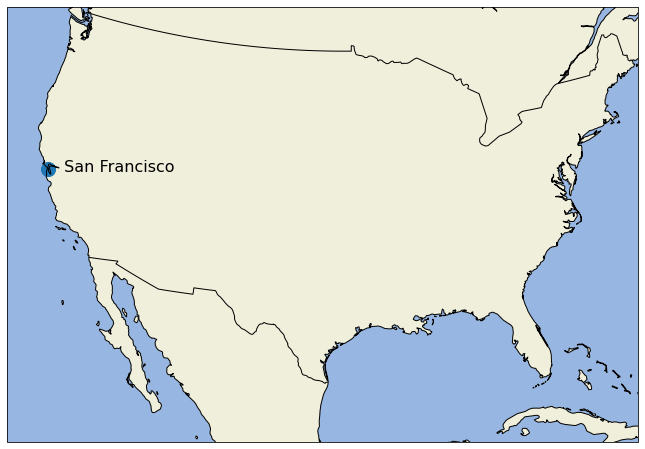

In [65]:
# Mapping the most populous San Francisco
best_sf = max(gc.get_cities_by_name('San Francisco'), key=lambda x: list(x.values())[0]['population'])
sf_data = list(best_sf.values())[0]
sf_lat = sf_data['latitude']
sf_lon = sf_data['longitude']

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=LambertConformal())
ax.set_extent(us_extent)
ax.scatter(sf_lon, sf_lat, transform=PlateCarree(), s=200)
add_map_features()
ax.text(sf_lon + 1, sf_lat, ' San Francisco', fontsize=16, transform=PlateCarree())
plt.show()

In [66]:
# 11.3.3 Limitations of the GeoNamesCache library
# Fetching New York City from GeoNamesCache
for ny_name in ['New York', 'New York City']:
    if not gc.get_cities_by_name(ny_name):
        print(f"'{ny_name}' is not present in the GeoNamesCache database")
    else:
        print(f"'{ny_name}' is present in the GeoNamesCache database")

'New York' is not present in the GeoNamesCache database
'New York City' is present in the GeoNamesCache database


In [69]:
# Diacritics: accent marks that designate the proper pronunciation of non-english words
# Fetching accented cities from GeoNamesCache
pp.pprint(gc.get_cities_by_name(u'Cañon City'))

[{'5416005': {'admin1code': 'CO',
              'alternatenames': ['CNE',
                                 'Canon City',
                                 'Canyon City',
                                 'Cañon City',
                                 'East Canon',
                                 'Kanon Siti',
                                 'Kanono siti',
                                 'Keniun Siti',
                                 'kann syty  klradw',
                                 'kanwn syty',
                                 'kyanana siti',
                                 'Каноно сити',
                                 'Кањон Сити',
                                 'Кениън Сити',
                                 'كانون سيتي',
                                 'کانن سیتی، کلرادو',
                                 'کینن سٹی، کولوراڈو',
                                 'क्यानन सिटी'],
              'countrycode': 'US',
              'geonameid': 5416005,
              'latitude':

In [72]:
# Counting all accented cities in GeoNamesCache
from unidecode import unidecode
accented_names = [city['name'] for city in gc.get_cities().values() if city['name'] != unidecode(city['name'])]
num_accented_cities = len(accented_names)

print(f"An example accented city name is '{accented_names[0]}'")
print(f"{num_accented_cities} cities have accented names")

An example accented city name is 'Khawr Fakkān'
5041 cities have accented names


In [73]:
# Stripping accents fro alternative city names
alternative_names = {unidecode(name): name for name in accented_names}
print(gc.get_cities_by_name(alternative_names['Hagatna']))

[{'4044012': {'geonameid': 4044012, 'name': 'Hagåtña', 'latitude': 13.47567, 'longitude': 144.74886, 'countrycode': 'GU', 'population': 1051, 'timezone': 'Pacific/Guam', 'admin1code': 'AN', 'alternatenames': ['Agadna', 'Agana', 'Agana -1998', 'Agania', 'Aganija', 'Aganja', 'Agano', 'Agaña', 'Aguana', 'Akashi', 'Akashi - JP renamed WW2', 'Ankana', 'City of Ignacio de Agana', 'City of Saint Ignacio de Agana', 'Ciudad de San Ignacio de Agana', 'Hagadna', 'Hagatna', 'Hagåtña', 'Haqatna', 'Jagatna', 'Khagatna', 'San Ignacio de Agana *', "Ville d'Agana", "Vjoska Agan'ja", 'a jia ni ya', 'akatna', 'ha katya', 'hagania', 'hagasnya', 'hagatna', 'hagatnya', 'haghatnya', "hegatn'ya", 'Αγκάνα', 'Вёска Аганья', 'Хагатна', 'Хагатња', 'Հագատնա', 'هاغاتنيا', 'هاگاتنا', 'هاگاتنیا', 'हेगात्न्या', 'அகாத்ன', 'ฮากาตญา', 'ჰაგატნა', 'ハガニア', '阿加尼亚', '하갓냐']}}]


In [75]:
# Finding accent-free city names in text
text = 'This sentence matches Hagatna'
for key, value in alternative_names.items():
    if key in text:
        pp.pprint(gc.get_cities_by_name(value))
        break

[{'4044012': {'admin1code': 'AN',
              'alternatenames': ['Agadna',
                                 'Agana',
                                 'Agana -1998',
                                 'Agania',
                                 'Aganija',
                                 'Aganja',
                                 'Agano',
                                 'Agaña',
                                 'Aguana',
                                 'Akashi',
                                 'Akashi - JP renamed WW2',
                                 'Ankana',
                                 'City of Ignacio de Agana',
                                 'City of Saint Ignacio de Agana',
                                 'Ciudad de San Ignacio de Agana',
                                 'Hagadna',
                                 'Hagatna',
                                 'Hagåtña',
                                 'Haqatna',
                                 'Jagatna',
               

In [76]:
# 11.4 Matching location names in text
# Basic substring matching
assert 'Boston' in 'Boston Marathon'
assert 'Boston Marathon'.startswith('Boston')
assert 'Boston Marathon'.endswith('Boston') == False

In [77]:
# Basic substring matching errors
assert 'in a' in 'sin apple'
assert 'in a' in 'win attached'

In [78]:
# String matching using regexes
import re
regex = 'Boston'
random_text = 'Clown Patty'
match = re.search(regex, random_text)
assert match is None

matchable_text = 'Boston Marathon'
match = re.search(regex, matchable_text)
assert match is not None
start, end = match.start(), match.end()
matched_string = matchable_text[start: end]
assert matched_string == 'Boston'

In [79]:
# Case-insensitive matching using regexes
for text in ['BOSTON', 'Boston', 'BoStOn']:
    assert re.search(regex, text, flags=re.IGNORECASE) is not None

In [80]:
for regex in ['\\bin a\\b', r'\bin a\b']:
    for text in ['sin apple', 'win attached']:
        assert re.search(regex, text) is None
        
    text = 'Match in a string'
    assert re.search(regex, text) is not None

In [81]:
# Multiplicity matching using regexes
regex = r'I visited \b(Boston|Philadelphia|San Francisco)\b yesterday.'
assert re.search(regex, 'I visited Chicago yesterday.') is None

cities = ['Boston', 'Philadelphia', 'San Francisco']
for city in cities:
    assert re.search(regex, f'I visited {city} yesterday.') is not None

In [82]:
# String matching using compiled regexes
compiled_re = re.compile(regex)
text = 'I visited Boston yesterday.'
for i in range(1000):
    assert compiled_re.search(text) is not None
    
# any flags must be put into re.compile(regex, flags=re.IGNORECASE)

# Key Words / Notes
- **Great-Circle Distance:** Computes the distance between two places on a sphere with trigonometric operations
- **Spherical Coordinates:** Longitude and Latitude are spherical coordinates
- **Plate Carree:** Projection of the entire globe
- **Orthographic Projection:** Projection of the scale of North America
- **Lambert Conformal Conic Projection:** Projection of smaller scales, such as the United States
- With the GeoNamesCache library, we can map city names to longitude and latitude and use a country's city names to estimate where it is. Will not give an exact middle location due to randomness of city dispersal in countries
- Multiple cities commonly share an identical name and GeoNamesCache can map multiple coordinates to a single city name.
- Without context, the city with the most population should be chosen if there are multiple cities with the same name
- Can use *unidecode* to strip city names of their accented letters
- Can use *regex* to find location names in text